In [46]:
# Data Wrangling 
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [47]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [48]:
display("### First 5 Rows of the Dataset ###")
display(df.head())

display("### Dataset Information ###")
display(df.info())

display("### Summary Statistics ###")
display(df.describe())


'### First 5 Rows of the Dataset ###'

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


'### Dataset Information ###'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


None

'### Summary Statistics ###'

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Visualization

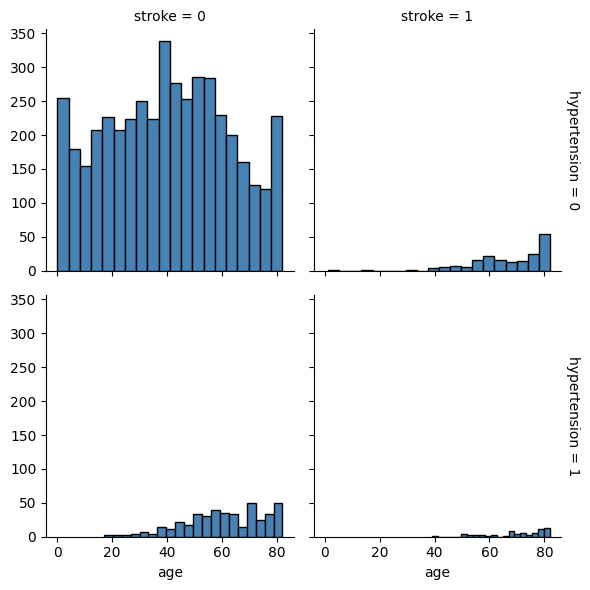

In [49]:
g = sns.FacetGrid(df, col="stroke", row='hypertension',height=3, aspect=1,
                  palette="viridis", margin_titles=True)
g.map(plt.hist, "age", bins=20, color="steelblue", edgecolor="black")

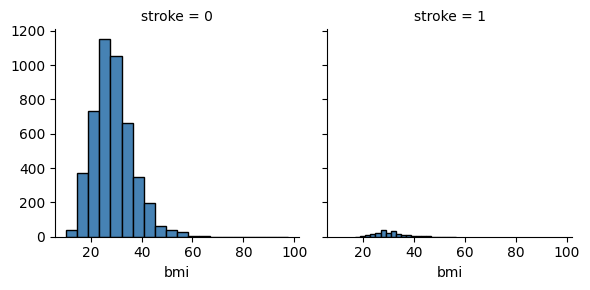

In [50]:
g = sns.FacetGrid(df, col="stroke", height=3, aspect=1,
                  palette="viridis", margin_titles=True)
g.map(plt.hist, "bmi", bins=20, color="steelblue", edgecolor="black")

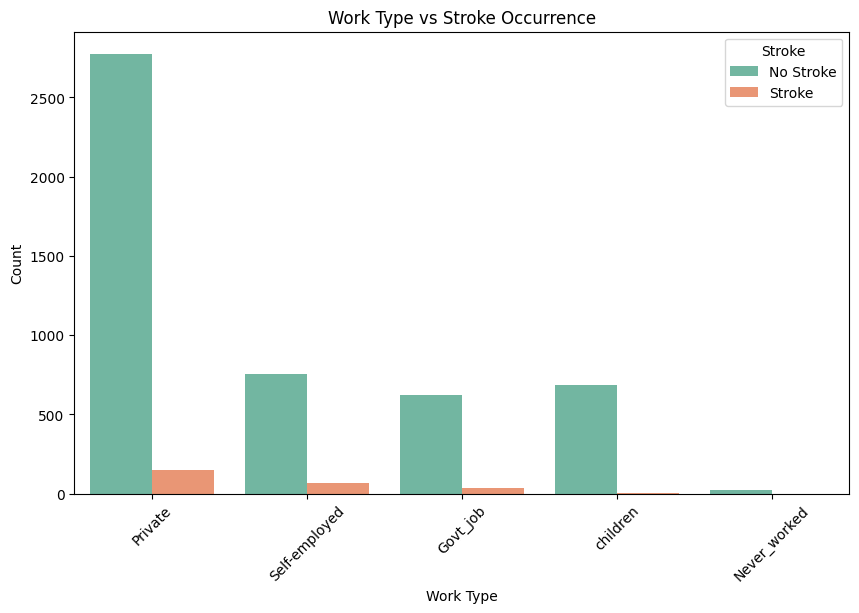

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(x='work_type', hue='stroke', data=df, palette='Set2')
plt.title('Work Type vs Stroke Occurrence')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Stroke', loc='upper right', labels=['No Stroke', 'Stroke'])
plt.show()

<Axes: xlabel='smoking_status', ylabel='count'>

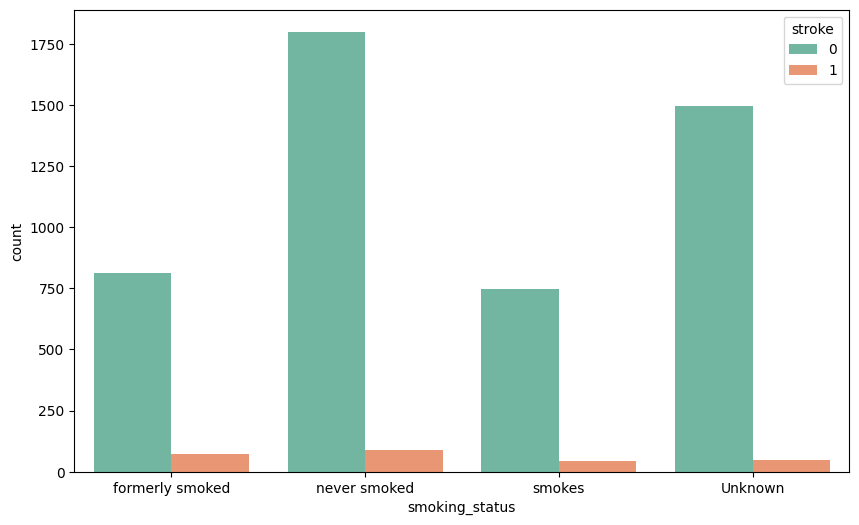

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(x='smoking_status', hue='stroke', data=df, palette='Set2')

In [53]:
# stroke numbers by unkown smoking status
display(df[df['smoking_status']=='Unknown']['stroke'].value_counts())
display(df['smoking_status'].value_counts())

print(df['smoking_status'].isnull().sum())


stroke
0    1497
1      47
Name: count, dtype: int64

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

0


In [54]:
smoking_marking = {'formerly smoked': 1, 'never smoked': 0, 'smokes': 2, 'Unknown': 3}
df['smoking_status'] = df['smoking_status'].map(smoking_marking)
df['smoking_status']

0       1
1       0
2       0
3       2
4       0
       ..
5105    0
5106    0
5107    0
5108    1
5109    3
Name: smoking_status, Length: 5110, dtype: int64

In [55]:
mean_bmi = df['bmi'].mean()
df['bmi'] = df['bmi'].fillna(mean_bmi)
df['bmi'].isnull().sum()

0

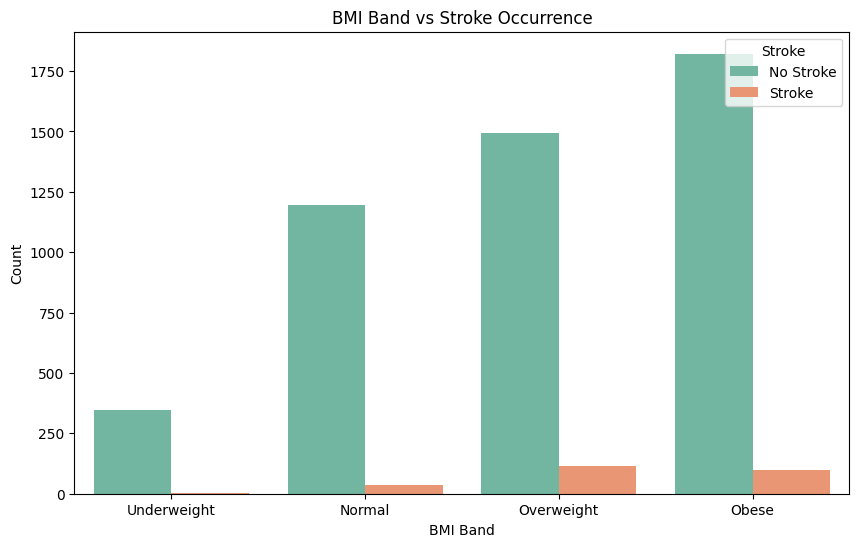

In [56]:
df['bmiBand'] = pd.cut(df['bmi'], bins=[0,18.5,24.9,29.9,100],labels=['Underweight','Normal','Overweight','Obese'])
plt.figure(figsize=(10,6))
sns.countplot(x='bmiBand', hue='stroke', data=df, palette='Set2')
plt.title('BMI Band vs Stroke Occurrence')
plt.xlabel('BMI Band')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right', labels=['No Stroke', 'Stroke'])
plt.show()

In [57]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmiBand
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,1,1,Obese
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,0,1,Overweight
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,0,1,Obese
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,2,1,Obese
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,0,1,Normal
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,1,1,Overweight
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,0,1,Overweight
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,0,1,Normal
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,3,1,Overweight
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,3,1,Normal


In [58]:
bmi_marking = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}
df['bmiBand'] = df['bmiBand'].map(bmi_marking)
df['bmiBand']

0       3
1       2
2       3
3       3
4       1
       ..
5105    2
5106    3
5107    3
5108    2
5109    2
Name: bmiBand, Length: 5110, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [59]:
# Encoding Residence Type with get_dummies as 0 and 1 not true and false
residence_dummies = pd.get_dummies(df['Residence_type'], drop_first=True, prefix='Residence')
residence_dummies = residence_dummies.astype(int)
df = pd.concat([df, residence_dummies], axis=1)
df.head(10)



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmiBand,Residence_Urban
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,1,1,3,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,0,1,2,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,0,1,3,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,2,1,3,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,0,1,1,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,1,1,2,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,0,1,2,0
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,0,1,1,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,3,1,2,0
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,3,1,1,1


In [65]:
df.drop('Residence_type', axis=1, inplace=True)

In [60]:
married_marking = {'Yes': 1, 'No': 0}
df['ever_married'] = df['ever_married'].map(married_marking)
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmiBand,Residence_Urban
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.600000,1,1,3,1
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,0,1,2,0
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.500000,0,1,3,0
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.400000,2,1,3,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,0,1,1,0
5,56669,Male,81.0,0,0,1,Private,Urban,186.21,29.000000,1,1,2,1
6,53882,Male,74.0,1,1,1,Private,Rural,70.09,27.400000,0,1,2,0
7,10434,Female,69.0,0,0,0,Private,Urban,94.39,22.800000,0,1,1,1
8,27419,Female,59.0,0,0,1,Private,Rural,76.15,28.893237,3,1,2,0
9,60491,Female,78.0,0,0,1,Private,Urban,58.57,24.200000,3,1,1,1


In [61]:
work_type_dummies = pd.get_dummies(df['work_type'], drop_first=True, prefix='workType', dtype=int)
df = pd.concat([df, work_type_dummies], axis=1)
df.drop('work_type', axis=1, inplace=True)
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmiBand,Residence_Urban,workType_Never_worked,workType_Private,workType_Self-employed,workType_children
0,9046,Male,67.0,0,1,1,Urban,228.69,36.600000,1,1,3,1,0,1,0,0
1,51676,Female,61.0,0,0,1,Rural,202.21,28.893237,0,1,2,0,0,0,1,0
2,31112,Male,80.0,0,1,1,Rural,105.92,32.500000,0,1,3,0,0,1,0,0
3,60182,Female,49.0,0,0,1,Urban,171.23,34.400000,2,1,3,1,0,1,0,0
4,1665,Female,79.0,1,0,1,Rural,174.12,24.000000,0,1,1,0,0,0,1,0
5,56669,Male,81.0,0,0,1,Urban,186.21,29.000000,1,1,2,1,0,1,0,0
6,53882,Male,74.0,1,1,1,Rural,70.09,27.400000,0,1,2,0,0,1,0,0
7,10434,Female,69.0,0,0,0,Urban,94.39,22.800000,0,1,1,1,0,1,0,0
8,27419,Female,59.0,0,0,1,Rural,76.15,28.893237,3,1,2,0,0,1,0,0
9,60491,Female,78.0,0,0,1,Urban,58.57,24.200000,3,1,1,1,0,1,0,0


In [62]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmiBand,Residence_Urban,workType_Never_worked,workType_Private,workType_Self-employed,workType_children
0,9046,Male,67.0,0,1,1,Urban,228.69,36.600000,1,1,3,1,0,1,0,0
1,51676,Female,61.0,0,0,1,Rural,202.21,28.893237,0,1,2,0,0,0,1,0
2,31112,Male,80.0,0,1,1,Rural,105.92,32.500000,0,1,3,0,0,1,0,0
3,60182,Female,49.0,0,0,1,Urban,171.23,34.400000,2,1,3,1,0,1,0,0
4,1665,Female,79.0,1,0,1,Rural,174.12,24.000000,0,1,1,0,0,0,1,0
5,56669,Male,81.0,0,0,1,Urban,186.21,29.000000,1,1,2,1,0,1,0,0
6,53882,Male,74.0,1,1,1,Rural,70.09,27.400000,0,1,2,0,0,1,0,0
7,10434,Female,69.0,0,0,0,Urban,94.39,22.800000,0,1,1,1,0,1,0,0
8,27419,Female,59.0,0,0,1,Rural,76.15,28.893237,3,1,2,0,0,1,0,0
9,60491,Female,78.0,0,0,1,Urban,58.57,24.200000,3,1,1,1,0,1,0,0


In [63]:
gender_marking = {'Male' : 1, 'Female' : 0, 'Other' : 2}
df['gender'] = df['gender'].map(gender_marking)
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmiBand,Residence_Urban,workType_Never_worked,workType_Private,workType_Self-employed,workType_children
0,9046,1,67.0,0,1,1,Urban,228.69,36.600000,1,1,3,1,0,1,0,0
1,51676,0,61.0,0,0,1,Rural,202.21,28.893237,0,1,2,0,0,0,1,0
2,31112,1,80.0,0,1,1,Rural,105.92,32.500000,0,1,3,0,0,1,0,0
3,60182,0,49.0,0,0,1,Urban,171.23,34.400000,2,1,3,1,0,1,0,0
4,1665,0,79.0,1,0,1,Rural,174.12,24.000000,0,1,1,0,0,0,1,0
5,56669,1,81.0,0,0,1,Urban,186.21,29.000000,1,1,2,1,0,1,0,0
6,53882,1,74.0,1,1,1,Rural,70.09,27.400000,0,1,2,0,0,1,0,0
7,10434,0,69.0,0,0,0,Urban,94.39,22.800000,0,1,1,1,0,1,0,0
8,27419,0,59.0,0,0,1,Rural,76.15,28.893237,3,1,2,0,0,1,0,0
9,60491,0,78.0,0,0,1,Urban,58.57,24.200000,3,1,1,1,0,1,0,0


## ML Deployment

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,  LinearSVC

best_accuracy = 0
best_model_name = None
best_model_pipe = None

models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=300, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVC': SVC(),
    'LinearSVC': LinearSVC(max_iter=10000)
}

results = {} 

for name, model in models.items():
    pipe = Pipeline([
        ('classifier', model)
    ])
    
    pipe.fit(X_train, y_train)
    accuracy = pipe.score(X_test, y_test)
    results[name] = accuracy
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model_pipe = pipe
print("Model Accuracies:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")
print(f"\nBest Model: {best_model_name} with accuracy: {best_accuracy:.4f}")



Model Accuracies:
KNeighborsClassifier: 0.9521
GaussianNB: 0.3151
RandomForestClassifier: 0.9481
LogisticRegression: 0.9521
SVC: 0.9511
LinearSVC: 0.9511

Best Model: KNeighborsClassifier with accuracy: 0.9521


In [68]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = best_model_pipe.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[972   0]
 [ 49   1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022



In [69]:
# Random forest classifier's classification report and confusion matrix
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[968   4]
 [ 49   1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.20      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.58      0.51      0.50      1022
weighted avg       0.92      0.95      0.93      1022

